In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import os
%matplotlib inline

/Users/simonhaxby/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

This may take a minute or two ...
'ge' dictionary successfully loaded


In [5]:
term = 'reward'
tsaba.is_term(term)

True

In [6]:
tsaba.get_ns_act(term, thresh=-1, search_radii=2.5)

This may take a few minutes...


In [7]:
anal = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


t-value: -4.4783 
p-value: 8.559E-06
Effect size: -0.4317 



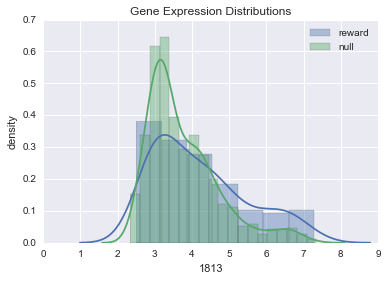

In [8]:
anal.term_ge_ttest(term, 1813, split_method='quant')

In [9]:
ttest_metr = anal.term_ge_ttest_multi(term)

This may take a couple of minutes ...


In [ ]:
df = geneinfo.load_gene_file("../../")

In [10]:
anal.fetch_gene_descriptions(ttest_metr, csv_path="../../");

Gene 353134 not found in NIH database
Gene 100008589 not found in NIH database
Gene 54874 not found in NIH database
Gene 128414 not found in NIH database
Gene 388585 not found in NIH database
Gene 641311 not found in NIH database
Gene 114885 not found in NIH database
Gene 27233 not found in NIH database
Gene 23620 not found in NIH database

Corrected Bonferroni Alpha: 2.405E-06


3250 (p = 6.222E-07; d = -0.484): [u'This gene encodes a haptoglobin-related protein that binds hemoglobin as efficiently as haptoglobin. Unlike haptoglobin, plasma concentration of this protein is unaffected in patients with sickle cell anemia and extensive intravascular hemolysis, suggesting a difference in binding between haptoglobin-hemoglobin and haptoglobin-related protein-hemoglobin complexes to CD163, the hemoglobin scavenger receptor. This protein may also be a clinically important predictor of recurrence of breast cancer. [provided by RefSeq, Oct 2011]']


4257 (p = 7.822E-07; d = -0.480): [u'The MAP

Percent Significant (Bonferroni Correction; alpha = .05): 0.072 %


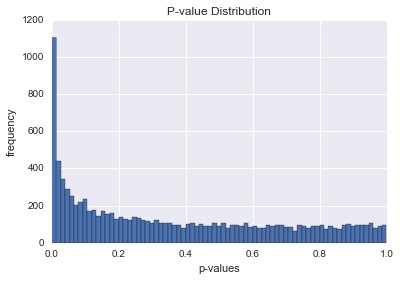

In [11]:
anal.p_val_distr(ttest_metr)

ZeroDivisionError: integer division or modulo by zero

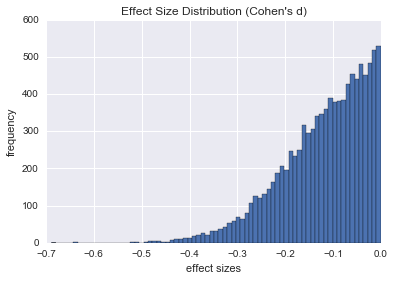

In [12]:
anal.effect_size_distr(ttest_metr)